<a href="https://colab.research.google.com/github/LammyG/HDSC-practical-time-series/blob/main/stage_E_quiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [31]:
from google.colab import files
uploaded = files.upload()

Saving Time_series_analysis_and_forecast_DATASET(1).csv to Time_series_analysis_and_forecast_DATASET(1).csv


In [32]:
df = pd.read_csv("Time_series_analysis_and_forecast_DATASET(1).csv")

In [33]:
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [34]:
df.columns

Index(['FullDate', 'Tmax', 'SysLoad', 'GasPrice', 'ElecPrice'], dtype='object')

In [35]:
df.shape

(92016, 5)

In [36]:
df.dropna(axis=1)

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.21500,3.6900,23.710
1,2010-09-01 01:00:00,15.8,1669.19500,3.6900,22.635
2,2010-09-01 02:00:00,15.8,1491.98000,3.6900,22.565
3,2010-09-01 03:00:00,15.8,1330.76000,3.6900,18.910
4,2010-09-01 04:00:00,15.8,1247.94000,3.6900,18.030
...,...,...,...,...,...
92011,2021-02-28 19:00:00,24.3,449.63625,5.4848,117.925
92012,2021-02-28 20:00:00,24.3,815.59975,5.4848,87.880
92013,2021-02-28 21:00:00,24.3,745.12325,5.4848,62.060
92014,2021-02-28 22:00:00,24.3,694.95150,5.4848,62.000


In [37]:
df.dropna(axis=0)

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.21500,3.6900,23.710
1,2010-09-01 01:00:00,15.8,1669.19500,3.6900,22.635
2,2010-09-01 02:00:00,15.8,1491.98000,3.6900,22.565
3,2010-09-01 03:00:00,15.8,1330.76000,3.6900,18.910
4,2010-09-01 04:00:00,15.8,1247.94000,3.6900,18.030
...,...,...,...,...,...
92011,2021-02-28 19:00:00,24.3,449.63625,5.4848,117.925
92012,2021-02-28 20:00:00,24.3,815.59975,5.4848,87.880
92013,2021-02-28 21:00:00,24.3,745.12325,5.4848,62.060
92014,2021-02-28 22:00:00,24.3,694.95150,5.4848,62.000


In [38]:
import sklearn as sn
import sklearn.linear_model as lm
import sklearn.model_selection as Ms
import sklearn.preprocessing as pp


Text(0, 0.5, 'ElecPrice')

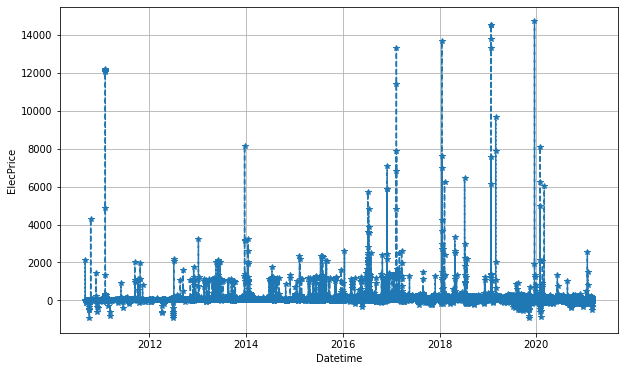

In [39]:
df["FullDate"] = pd.to_datetime(df["FullDate"])
df.set_index("FullDate", inplace=True)
plt.figure(figsize=(10, 6))
plt.plot(df.index, df.ElecPrice, '--', marker='*', )
plt.grid()
plt.xlabel('Datetime')
plt.ylabel('ElecPrice')

Text(0, 0.5, 'ElecPrice')

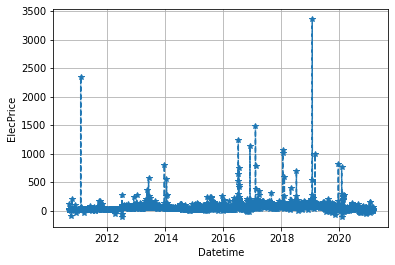

In [40]:
df_daily = df.resample('D').mean()
plt.plot(df_daily.index, df_daily.ElecPrice, '--', marker='*')
plt.grid()
plt.xlabel('Datetime')
plt.ylabel('ElecPrice')

In [41]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(df['SysLoad'])
print(f'ADF Statistics: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')

ADF Statistics: -18.17067542641451
p-value: 2.4474966090684217e-30


In [42]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(df['GasPrice'])
print(f'ADF Statistics: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')

ADF Statistics: -6.793388065452667
p-value: 2.3337605343636574e-09


In [43]:
print('Critical Values:')
for k, v in adf_result[4].items():
  print(f' {k}: {v}')

Critical Values:
 1%: -3.430421106837576
 5%: -2.86157142807793
 10%: -2.566786728071412


In [47]:
from fbprophet import Prophet
df = pd.read_csv("Time_series_analysis_and_forecast_DATASET(1).csv")


In [48]:
df['FullDate'] = pd.to_datetime(df['FullDate'])
df = df.rename(columns={"FullDate": "ds", "ElecPrice": "y"})
df.head()

,ds,Tmax,SysLoad,GasPrice,y
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [51]:
model = Prophet(weekly_seasonality=True, daily_seasonality=True)
model.fit(df)

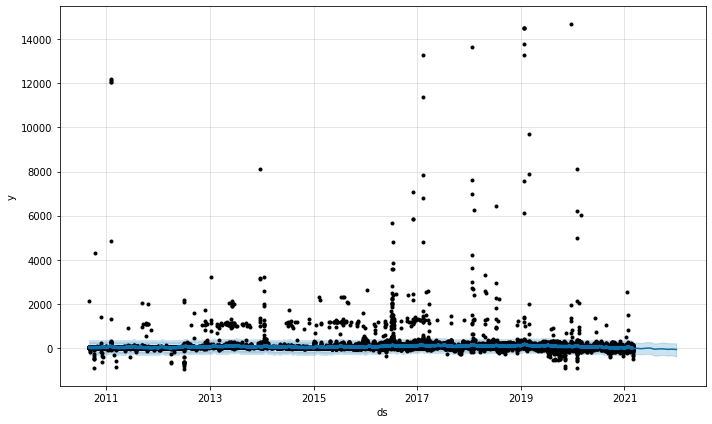

In [55]:
future = model.make_future_dataframe(periods=10, freq='M')
forecast = model.predict(future)
forecast.head()
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']]
model.plot(forecast)
plt.show()